In [11]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# Load the dataset
file_path = "unemployment analysis.csv"
unemployment_df = pd.read_csv(file_path)

# Preview the first few rows
unemployment_df.head()


,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [13]:
# Remove any extra spaces from column names
unemployment_df.columns = unemployment_df.columns.str.strip()

# Display cleaned column names
print(unemployment_df.columns.tolist())


['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [14]:
# Identify columns corresponding to unemployment rates (from 1991 onward)
year_columns = unemployment_df.columns[2:]  # Skipping 'Country Name' and 'Country Code'

# Print to confirm
print("Year columns detected:", year_columns.tolist())


Year columns detected: ['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [15]:
# Convert unemployment rate columns to numeric, handling any bad values gracefully
unemployment_df[year_columns] = unemployment_df[year_columns].apply(pd.to_numeric, errors='coerce')

# Check data types to confirm
unemployment_df[year_columns].dtypes.head()


,0
1991,float64
1992,float64
1993,float64
1994,float64
1995,float64


In [16]:
# Drop countries with all unemployment data missing
unemployment_df = unemployment_df.dropna(subset=year_columns, how='all')

# Reset index after dropping rows
unemployment_df.reset_index(drop=True, inplace=True)

# Check new shape
print("Dataset shape after cleaning:", unemployment_df.shape)


Dataset shape after cleaning: (235, 33)


# EDA

In [17]:
# Count how many countries have at least some valid unemployment data
valid_countries = unemployment_df.dropna(subset=year_columns, how='all')

print("Number of countries with at least one valid data point:", valid_countries.shape[0])


Number of countries with at least one valid data point: 235



Bottom 5 countries with lowest average unemployment:
    Country Name  Average_Unemployment
176        Qatar              0.569355
108     Cambodia              0.767419
139      Myanmar              0.803548
179       Rwanda              0.916774
201         Chad              0.950000

Top 5 most consistent (least volatile) countries in unemployment rate:
                    Country Name  Volatility
12                       Burundi    0.049222
228                      Vanuatu    0.118838
173  Pacific island small states    0.169979
169    Korea, Dem. People's Rep.    0.173885
18                       Bahrain    0.184768

Global unemployment standard deviation per year (first 5 years shown):
1991    6.013749
1992    6.296617
1993    6.335855
1994    6.243778
1995    6.330822
dtype: float64


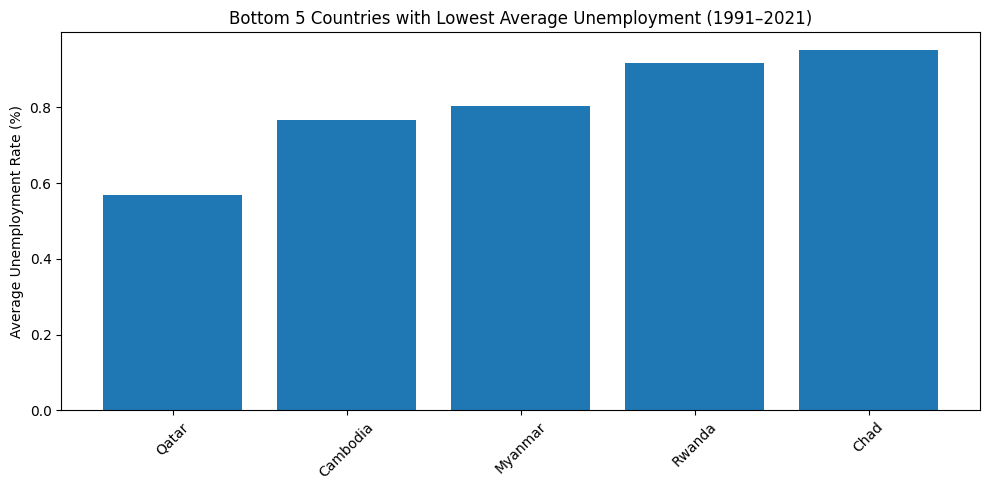

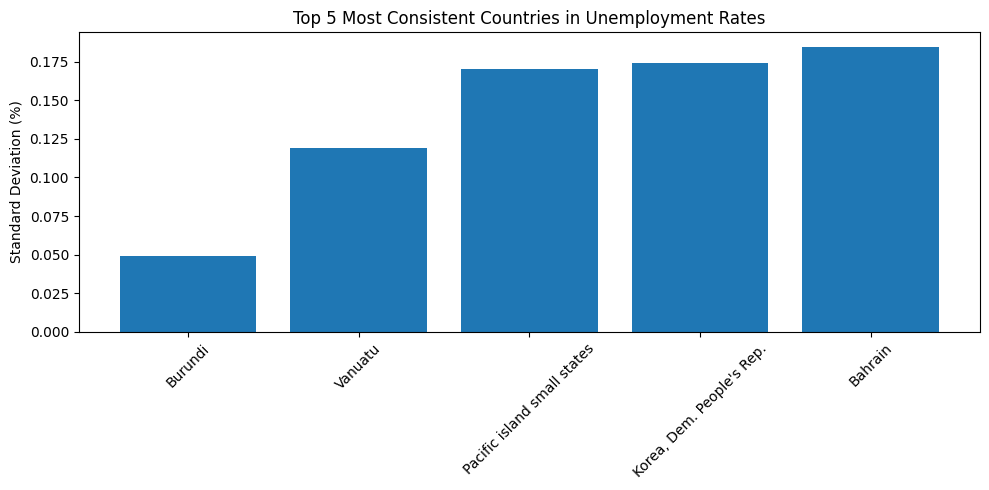

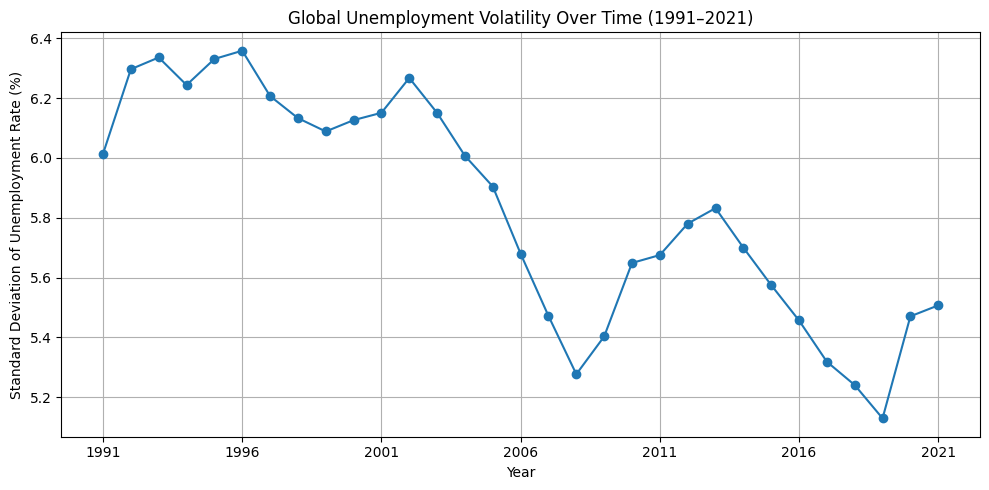

In [18]:
# --- Additional Data Analysis and Visualizations ---
unemployment_df['Average_Unemployment'] = unemployment_df[year_columns].mean(axis=1)

# Bottom 5 countries with the lowest average unemployment
bottom5_lowest = unemployment_df[['Country Name', 'Average_Unemployment']].sort_values(
    by='Average_Unemployment', ascending=True).head()

print("\nBottom 5 countries with lowest average unemployment:")
print(bottom5_lowest)

# Volatility: standard deviation across all years per country
unemployment_df['Volatility'] = unemployment_df[year_columns].std(axis=1)

# Top 5 most consistent countries (lowest volatility)
top5_consistent = unemployment_df[['Country Name', 'Volatility']].sort_values(
    by='Volatility', ascending=True).head()

print("\nTop 5 most consistent (least volatile) countries in unemployment rate:")
print(top5_consistent)

# Global unemployment volatility per year
yearly_std = unemployment_df[year_columns].std()

print("\nGlobal unemployment standard deviation per year (first 5 years shown):")
print(yearly_std.head())

# --- Visualization Section ---

# 1. Bar plot: Bottom 5 countries with lowest average unemployment
plt.figure(figsize=(10, 5))
plt.bar(bottom5_lowest['Country Name'], bottom5_lowest['Average_Unemployment'])
plt.title("Bottom 5 Countries with Lowest Average Unemployment (1991–2021)")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Bar plot: Top 5 most consistent countries (lowest volatility)
plt.figure(figsize=(10, 5))
plt.bar(top5_consistent['Country Name'], top5_consistent['Volatility'])
plt.title("Top 5 Most Consistent Countries in Unemployment Rates")
plt.ylabel("Standard Deviation (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Line plot: Global unemployment volatility trend
plt.figure(figsize=(10, 5))
yearly_std.plot(marker='o')
plt.title("Global Unemployment Volatility Over Time (1991–2021)")
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# Create a new column with average unemployment across all years
unemployment_df['Average_Unemployment'] = unemployment_df[year_columns].mean(axis=1)

# Show top 5 countries with highest average unemployment
top5_highest = unemployment_df[['Country Name', 'Average_Unemployment']].sort_values(
    by='Average_Unemployment', ascending=False).head()

print("Top 5 countries with highest average unemployment:")
print(top5_highest)


Top 5 countries with highest average unemployment:
        Country Name  Average_Unemployment
123          Lesotho             30.396452
136  North Macedonia             29.789677
232     South Africa             28.232581
49          Djibouti             27.733226
199         Eswatini             24.391290


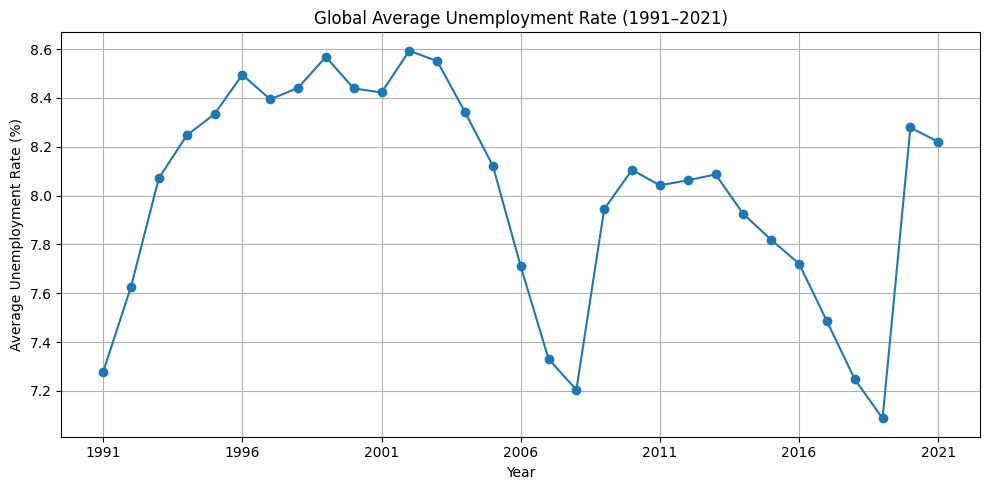

In [20]:
# Calculate average unemployment for each year (across all countries)
avg_unemployment_over_time = unemployment_df[year_columns].mean()

# Plot the global average unemployment trend
plt.figure(figsize=(10, 5))
avg_unemployment_over_time.plot(marker='o')
plt.title("Global Average Unemployment Rate (1991–2021)")
plt.xlabel("Year")
plt.ylabel("Average Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Clean column names
unemployment_df.columns = unemployment_df.columns.str.strip()

#  Select only year columns (e.g., '1991' to '2021')
year_columns = [col for col in unemployment_df.columns if col.isdigit()]


In [22]:
# List of countries to forecast
selected_countries = ['India', 'United States', 'Brazil', 'South Africa', 'Germany']

# Define forecast years (2022–2026)
forecast_years = pd.date_range(start=pd.Timestamp("2022-01-01"), periods=5, freq='Y')


<ipython-input-22-378d70b56f5c>:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start=pd.Timestamp("2022-01-01"), periods=5, freq='Y')


In [23]:
# Store forecast results
forecast_data = []

# Loop through selected countries
for country in selected_countries:
    row = unemployment_df[unemployment_df['Country Name'] == country]

    if not row.empty:
        # Extract and clean series
        values = pd.to_numeric(row[year_columns].values.flatten(), errors='coerce')
        series = pd.Series(values, index=pd.to_datetime(year_columns, format='%Y')).dropna()

        if len(series) >= 5:
            try:
                # ARIMA
                arima_model = ARIMA(series, order=(1, 1, 1))
                arima_fit = arima_model.fit()
                arima_forecast = arima_fit.forecast(steps=5)

                # Holt's Linear Trend
                holt_model = ExponentialSmoothing(series, trend='additive', seasonal=None)
                holt_fit = holt_model.fit()
                holt_forecast = holt_fit.forecast(steps=5)

                for i in range(5):
                    forecast_data.append({
                        'Country': country,
                        'Year': forecast_years[i].year,
                        'ARIMA Forecast': round(arima_forecast[i], 2),
                        'Holt Forecast': round(holt_forecast[i], 2)
                    })
            except Exception as e:
                print(f"Skipping {country} due to error: {e}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred freq

In [24]:
# Create DataFrame
forecast_df = pd.DataFrame(forecast_data)
forecast_df


,Country,Year,ARIMA Forecast,Holt Forecast
0,India,2022,5.68,5.72
1,India,2023,5.65,5.72
2,India,2024,5.65,5.73
3,India,2025,5.65,5.73
4,India,2026,5.65,5.74
5,United States,2022,5.59,5.48
6,United States,2023,5.69,5.44
7,United States,2024,5.76,5.39
8,United States,2025,5.81,5.35
9,United States,2026,5.85,5.31


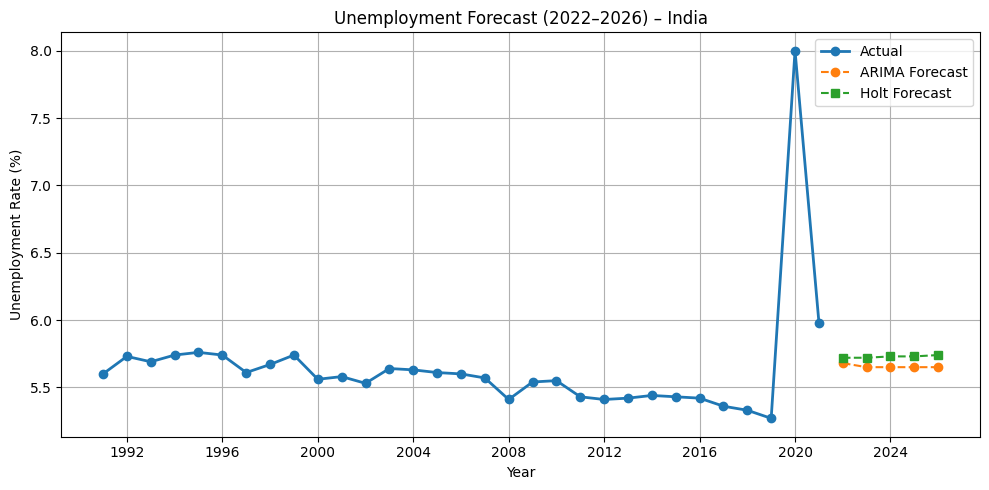

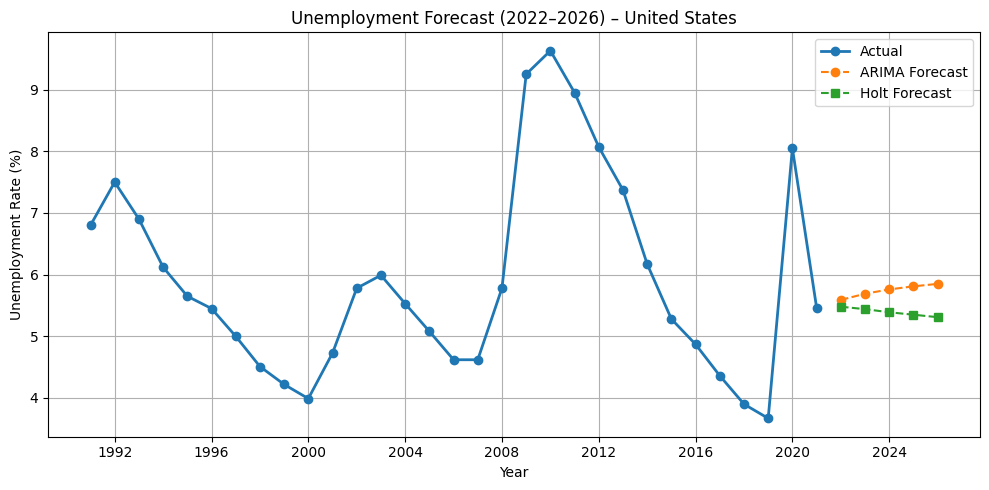

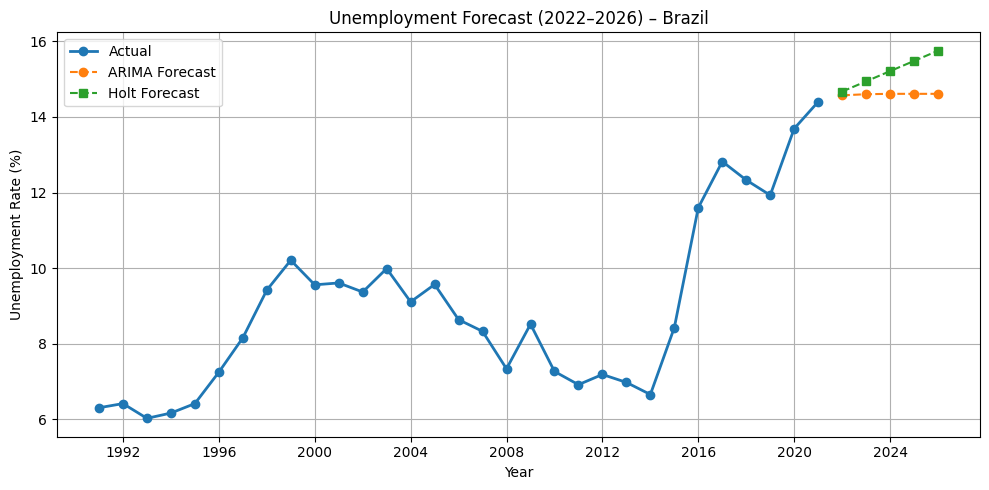

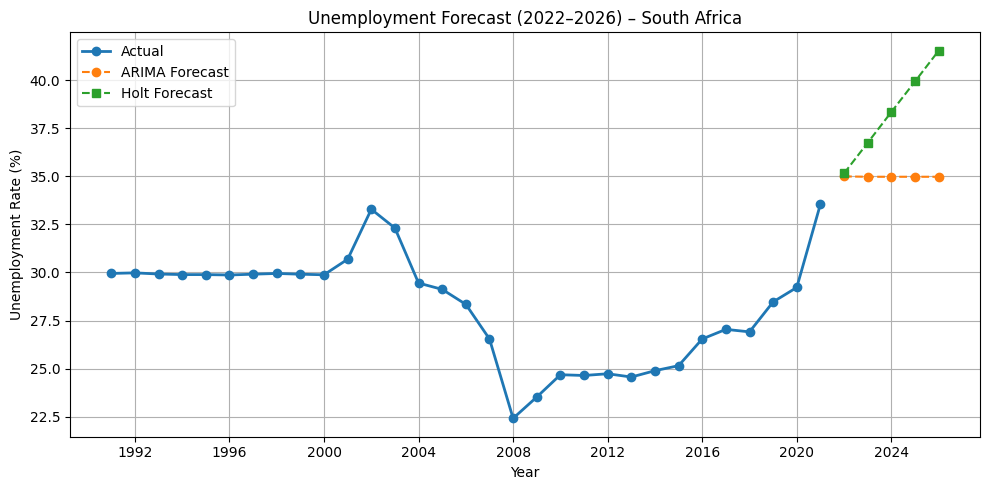

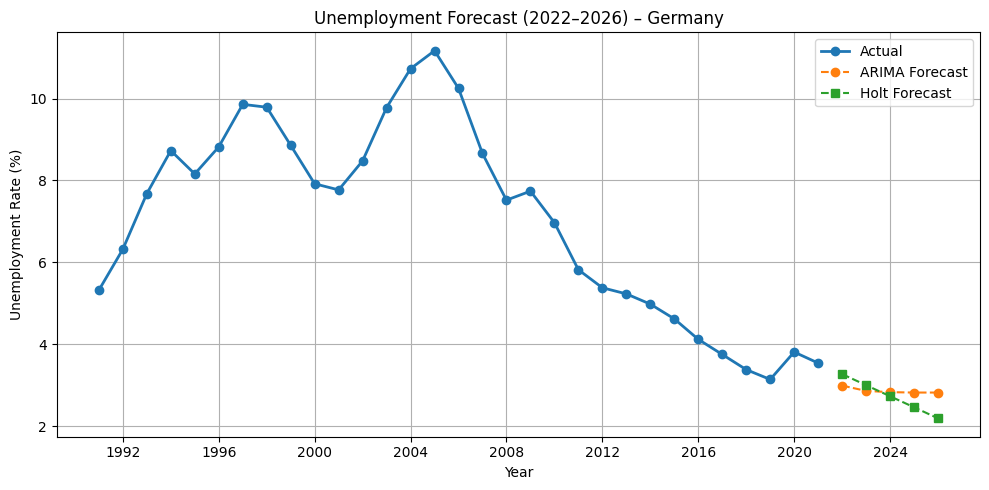

In [25]:
# Plot each country's actual vs forecast
for country in selected_countries:
    # Get historical data
    row = unemployment_df[unemployment_df['Country Name'] == country]
    values = pd.to_numeric(row[year_columns].values.flatten(), errors='coerce')
    series = pd.Series(values, index=pd.to_datetime(year_columns, format='%Y')).dropna()

    # Get forecasted data
    country_forecast = forecast_df[forecast_df['Country'] == country]
    forecast_dates = pd.to_datetime(country_forecast['Year'], format='%Y')

    # Plot actual and forecasts
    plt.figure(figsize=(10, 5))
    plt.plot(series, label='Actual', marker='o', linewidth=2)
    plt.plot(forecast_dates, country_forecast['ARIMA Forecast'], marker='o', linestyle='--', label='ARIMA Forecast')
    plt.plot(forecast_dates, country_forecast['Holt Forecast'], marker='s', linestyle='--', label='Holt Forecast')

    plt.title(f"Unemployment Forecast (2022–2026) – {country}")
    plt.xlabel("Year")
    plt.ylabel("Unemployment Rate (%)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Store evaluation results
evaluation_results = []

for country in selected_countries:
    row = unemployment_df[unemployment_df['Country Name'] == country]
    values = pd.to_numeric(row[year_columns].values.flatten(), errors='coerce')
    series = pd.Series(values, index=pd.to_datetime(year_columns, format='%Y')).dropna()

    # Only evaluate if enough data is available
    if len(series) >= 25:  # At least 25 years
        # Split into train (up to 2016) and test (2017–2021)
        train = series[:'2016']
        test = series['2017':'2021']

        try:
            # ARIMA Forecast
            arima_model = ARIMA(train, order=(1, 1, 1))
            arima_fit = arima_model.fit()
            arima_pred = arima_fit.forecast(steps=5)

            # Holt Forecast
            holt_model = ExponentialSmoothing(train, trend='additive', seasonal=None)
            holt_fit = holt_model.fit()
            holt_pred = holt_fit.forecast(steps=5)

            # Evaluation metrics
            arima_mae = mean_absolute_error(test, arima_pred)
            arima_rmse = np.sqrt(mean_squared_error(test, arima_pred))

            holt_mae = mean_absolute_error(test, holt_pred)
            holt_rmse = np.sqrt(mean_squared_error(test, holt_pred))

            evaluation_results.append({
                'Country': country,
                'ARIMA MAE': round(arima_mae, 2),
                'ARIMA RMSE': round(arima_rmse, 2),
                'Holt MAE': round(holt_mae, 2),
                'Holt RMSE': round(holt_rmse, 2)
            })

        except Exception as e:
            print(f"Error evaluating {country}: {e}")
            continue

# Convert to DataFrame
evaluation_df = pd.DataFrame(evaluation_results)
evaluation_df.head()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

,Country,ARIMA MAE,ARIMA RMSE,Holt MAE,Holt RMSE
0,India,0.69,1.18,0.70,1.21
1,United States,1.26,1.66,1.34,1.73
2,Brazil,0.69,0.91,5.74,6.47
3,South Africa,2.33,3.36,2.91,3.90
4,Germany,0.24,0.30,0.90,1.17


In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

selected_countries = ['India', 'United States', 'Brazil', 'South Africa', 'Germany']
best_holt_results = []

print("Holt’s Method Evaluation with Optimized Parameters:\n")

for country in selected_countries:
    print(f"Country: {country}")

    row = unemployment_df[unemployment_df['Country Name'] == country]
    if row.empty:
        print("   Data not found.\n")
        continue

    series = row[year_columns].T.squeeze().reset_index(drop=True)
    series.index = pd.RangeIndex(len(series))

    train = series[:-5]
    test = series[-5:]

    try:
        model = ExponentialSmoothing(train, trend='add', seasonal=None)
        fit = model.fit(optimized=True)
        forecast = fit.forecast(steps=5)

        mae = mean_absolute_error(test, forecast)
        rmse = np.sqrt(mean_squared_error(test, forecast))

        print(f"   MAE: {mae:.2f}, RMSE: {rmse:.2f}\n")

        best_holt_results.append({
            'Country': country,
            'Trend': 'add',
            'Optimized': True,
            'MAE': mae,
            'RMSE': rmse
        })

    except Exception as e:
        print(f"   Model failed: {e}\n")

# Display results
best_holt_df = pd.DataFrame(best_holt_results)
print("\nSummary of Holt's Method Results:")
print(best_holt_df)


Holt’s Method Evaluation with Optimized Parameters:

Country: India
   MAE: 0.70, RMSE: 1.21

Country: United States
   MAE: 1.34, RMSE: 1.73

Country: Brazil
   MAE: 5.74, RMSE: 6.47

Country: South Africa
   MAE: 2.91, RMSE: 3.90

Country: Germany
   MAE: 0.90, RMSE: 1.17


Summary of Holt's Method Results:
         Country Trend  Optimized       MAE      RMSE
0          India   add       True  0.695014  1.213417
1  United States   add       True  1.336319  1.727112
2         Brazil   add       True  5.735343  6.468749
3   South Africa   add       True  2.909196  3.899107
4        Germany   add       True  0.904000  1.174513
